In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
import os
import nltk

# Importing Datasets
The datasets used in this file were downloaded from kaggle
> Link: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

There are three datasets available for us:
1. Books
2. Users
3. Ratings

In [2]:
books = pd.read_csv('datasets/Books.csv')
ratings = pd.read_csv('datasets/Ratings.csv')
users = pd.read_csv('datasets/Users.csv')
display(books.head())
display(ratings.head())
display(users.head())

C:\Users\xarad\AppData\Local\Temp\ipykernel_16104\4228171812.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('datasets/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
display(books.shape)
display(ratings.shape)
display(users.shape)

(271360, 8)

(1149780, 3)

(278858, 3)

# Shape of Data
We can see that we have more ratings than the number of books.

In [4]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Lets fix the author of the missing book and try to find the images url too.

In [5]:
books[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


# Filling missing values of Books datasets

In [6]:
books.iloc[187689]['Book-Title']

'The Credit Suisse Guide to Managing Your Personal Wealth'

After some google searches, we find that the author of this book is:<br>
***Downes, Larissa Anne***

In [7]:
books.iloc[187689]['Book-Author'] = 'Downes, Larissa Anne'

In [8]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
# Users dataset
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

# Dropping Age Column
As we can see, there are lots of missing values in age, it is ideal to drop the columns since imputation of these many users will cause the model to be biased and incorrect.

In [10]:
users.drop(columns=['Age'], inplace=True)

In [11]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Great, there are no missing values. So we dont have to drop anything.

# Checking duplicated values
Lets check for duplicated values in all datasets and drop them.

In [12]:
# Books dataset
books.duplicated().sum()

0

In [13]:
# Users dataset
users.duplicated().sum()

0

In [14]:
# Ratings dataset
ratings.duplicated().sum()

0

There are no duplicate values in the datasets.

# EDA
Lets perform EDA on the data

## Books Dataset

In [15]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [16]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

# Fixing Data
There has been some error in the year of publication on the index of:<br>
**209538**
<br>
**220731**
<br>
**221678**
<br>
So, we fix those data entries


In [17]:
books.iloc[209538]

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                                         2000
Year-Of-Publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/078946697X.0...
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [18]:
display(books.iloc[209538]['Book-Title'])
books.iloc[209538]['Year-Of-Publication']

'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"'

'DK Publishing Inc'

In [19]:
books.iloc[209538]['Book-Author'] = 'Michael Teitelbbaum'
books.iloc[209538][
    'Book-Title'] = 'DK Readers: The Story of the X-Men, How It All Began (Level 4: Proficient Readers)'
books.iloc[209538]['Year-Of-Publication'] = 2000
books.iloc[209538]['Publisher'] = 'DK Publishing Inc'


In [20]:
books.iloc[220731]

ISBN                                                          2070426769
Book-Title             Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
Book-Author                                                         2003
Year-Of-Publication                                            Gallimard
Publisher              http://images.amazon.com/images/P/2070426769.0...
Image-URL-S            http://images.amazon.com/images/P/2070426769.0...
Image-URL-M            http://images.amazon.com/images/P/2070426769.0...
Image-URL-L                                                          NaN
Name: 220731, dtype: object

In [21]:
books.iloc[220731]['Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers'"
books.iloc[220731]['Book-Author'] = 'Jean-Marie Gustave Le Clézio'
books.iloc[220731]['Year-Of-Publication'] = 1990
books.iloc[220731]['Publisher'] = 'Gallimard'


In [22]:
books.iloc[221678]

ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                         2000
Year-Of-Publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/0789466953.0...
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L                                                          NaN
Name: 221678, dtype: object

In [23]:
books.iloc[221678]['Book-Title']

'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"'

In [24]:
books.iloc[221678][
    'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.iloc[221678]['Book-Author'] = 'James Buckley'
books.iloc[221678]['Year-Of-Publication'] = 2000
books.iloc[221678]['Publisher'] = 'DK Publishing Inc'


In [25]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int64')

In [26]:
books['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

2050        2
2038        1
2037        1
2030        7
2026        1
2024        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       46
2004     5839
2003    14358
2002    17627
2001    17359
2000    17234
1999    17431
Name: Year-Of-Publication, dtype: int64

# Mistakes in Data?
We can see that there are few data with year of publication from future.

In [27]:
books[books['Year-Of-Publication']>2021][['Book-Title','Year-Of-Publication','Publisher','Book-Author']]

,Book-Title,Year-Of-Publication,Publisher,Book-Author
37487,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,2030,Aladdin,Coville
55676,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,2030,Aladdin,Bruce Coville
78168,Crossing America,2030,National Geographic,National Geographic Society
80264,Alice's Adventures in Wonderland and Through t...,2050,Puffin Books,Lewis Carroll
97826,Outline of European Architecture (Pelican S.),2050,Penguin USA,Nikolaus Pevsner
116053,Three Plays of Eugene Oneill,2038,Vintage Books USA,Eugene O'Neill
118294,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,2026,Goldmann,Kathy Lette
192993,"Field Guide to the Birds of North America, 3rd...",2030,National Geographic,National Geographic Society
228173,FOREST PEOPLE (Touchstone Books (Hardcover)),2030,Simon &amp; Schuster,Colin M. Turnbull
240169,In Our Time: Stories (Scribner Classic),2030,Collier Books,Ernest Hemingway


In [28]:
# Viewing the full names
display(books.iloc[37487]['Book-Title'])
display(books.iloc[55676]['Book-Title'])
display(books.iloc[80264]['Book-Title'])
display(books.iloc[192993]['Book-Title'])


'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'

'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'

"Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"

'Field Guide to the Birds of North America, 3rd Ed.'

# Fixing the year again
We can see the above books have years with publishing date from future, which is not possible.


In [29]:
books.loc[37487, 'Year-Of-Publication'] = 1991
books.iloc[37487]


ISBN                                                          0671746103
Book-Title             MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...
Book-Author                                                      Coville
Year-Of-Publication                                                 1991
Publisher                                                        Aladdin
Image-URL-S            http://images.amazon.com/images/P/0671746103.0...
Image-URL-M            http://images.amazon.com/images/P/0671746103.0...
Image-URL-L            http://images.amazon.com/images/P/0671746103.0...
Name: 37487, dtype: object

In [30]:
#'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Year-Of-Publication'] = 1991

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[55676, 'Year-Of-Publication'] = 2005

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Book-Author'] = 'Bruce Coville'

# "Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"
books.loc[80264, 'Year-Of-Publication'] = 2003

# 'Field Guide to the Birds of North America, 3rd Ed.'
books.loc[192993, 'Year-Of-Publication'] = 2003

# Crossing America
books.loc[78168, 'Year-Of-Publication'] = 2001

# Outline of European Architecture (Pelican S.)
books.loc[97826, 'Year-Of-Publication'] = 1981

# Three Plays of Eugene Oneill
books.loc[116053, 'Year-Of-Publication'] = 1995

# Setting to current date of project since no information could be found
# Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.
books.loc[118294, 'Year-Of-Publication'] = 2023

# FOREST PEOPLE (Touchstone Books (Hardcover))
books.loc[228173, 'Year-Of-Publication'] = 1987

# In Our Time: Stories (Scribner Classic)
books.loc[240169, 'Year-Of-Publication'] = 1996

# CLOUT
books.loc[246842, 'Year-Of-Publication'] = 1925

# To Have and Have Not
books.loc[255409, 'Year-Of-Publication'] = 1937

# FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS
books.loc[260974, 'Year-Of-Publication'] = 1991


In [31]:
display(
    books['Year-Of-Publication'].value_counts().sort_index().iloc[:20])
books['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

0       4618
1376       1
1378       1
1806       1
1897       1
1900       3
1901       7
1902       2
1904       1
1906       1
1908       1
1909       2
1910       1
1911      19
1914       1
1917       1
1919       1
1920      33
1921       2
1922       2
Name: Year-Of-Publication, dtype: int64

2023        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       47
2004     5839
2003    14360
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
Name: Year-Of-Publication, dtype: int64

Looks like we have a lot of books without the year data and hence set to 0

In [32]:
books[(books['Year-Of-Publication']<1400)&(books['Year-Of-Publication']>0)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...


These are probably mythological and religious books so the date could be correct. So, we donot alter the date for these entries.

In [33]:
books_year_rational = books[books['Year-Of-Publication']!=0]['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]
books_year_rational

2023        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       47
2004     5839
2003    14360
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
Name: Year-Of-Publication, dtype: int64

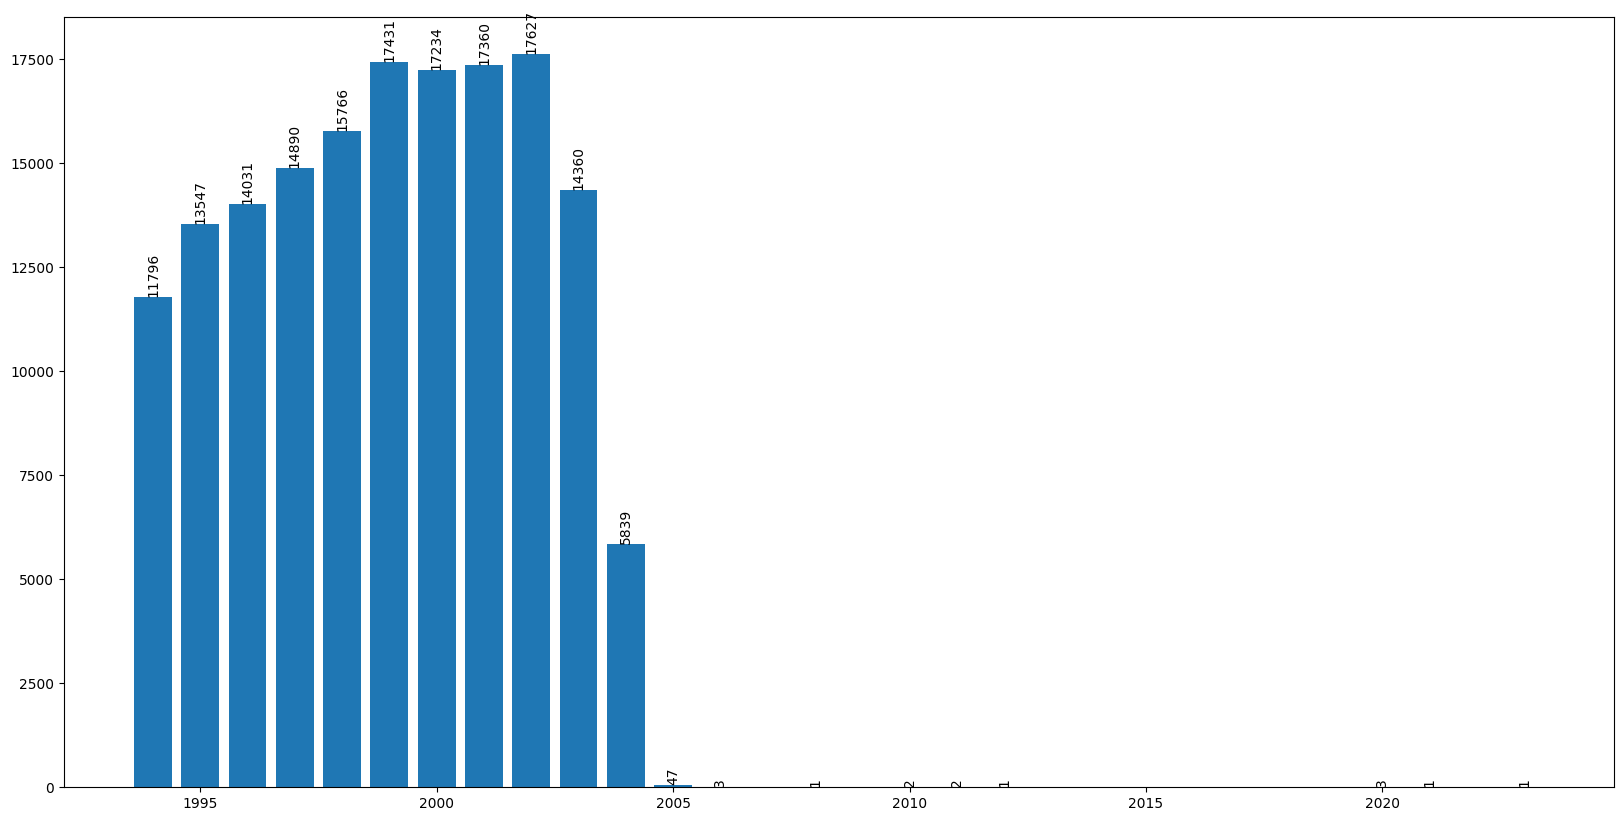

In [34]:
plt.figure(figsize=(20,10))
bars = plt.bar(x=books_year_rational.index,height=books_year_rational.values)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             '{:.0f}'.format(height), ha='center', va='bottom', rotation='90')
plt.show()

## Authors
Lets find out if there authors with multiple books or not

In [35]:
books[books['Book-Author'].duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
62,0679865691,Haveli (Laurel Leaf Books),SUZANNE FISHER STAPLES,1995,Laurel Leaf,http://images.amazon.com/images/P/0679865691.0...,http://images.amazon.com/images/P/0679865691.0...,http://images.amazon.com/images/P/0679865691.0...
67,0804106304,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...
74,0345465083,Seabiscuit,LAURA HILLENBRAND,2003,Ballantine Books,http://images.amazon.com/images/P/0345465083.0...,http://images.amazon.com/images/P/0345465083.0...,http://images.amazon.com/images/P/0345465083.0...
92,8445071769,El Senor De Los Anillos: Las DOS Torres (Lord ...,J. R. R. Tolkien,2001,Minotauro,http://images.amazon.com/images/P/8445071769.0...,http://images.amazon.com/images/P/8445071769.0...,http://images.amazon.com/images/P/8445071769.0...
93,8445071777,El Senor De Los Anillos: El Retorno Del Rey (T...,J. R. R. Tolkien,2001,Distribooks,http://images.amazon.com/images/P/8445071777.0...,http://images.amazon.com/images/P/8445071777.0...,http://images.amazon.com/images/P/8445071777.0...
...,...,...,...,...,...,...,...,...
271353,014002803X,Anti Death League,Kingsley Amis,1975,Viking Press,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...


Lets find their number of books per author

In [36]:
# Number of unique authors
len(books['Book-Author'].unique())

102023

In [37]:
author_book_count = books['Book-Author'].value_counts()
author_book_count.head(20)

Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Name: Book-Author, dtype: int64

### Error in author name:
Looks like there are a lot of books with no authors. So lets drop them for a while and count the rest

In [38]:
author_book_count = books[books['Book-Author']!= 'Not Applicable (Na )']
author_book_count_top50 = author_book_count.groupby('Book-Author').count()['Book-Title'].sort_values(ascending=False).head(50)
author_book_count_top50.head(10)

Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: Book-Title, dtype: int64

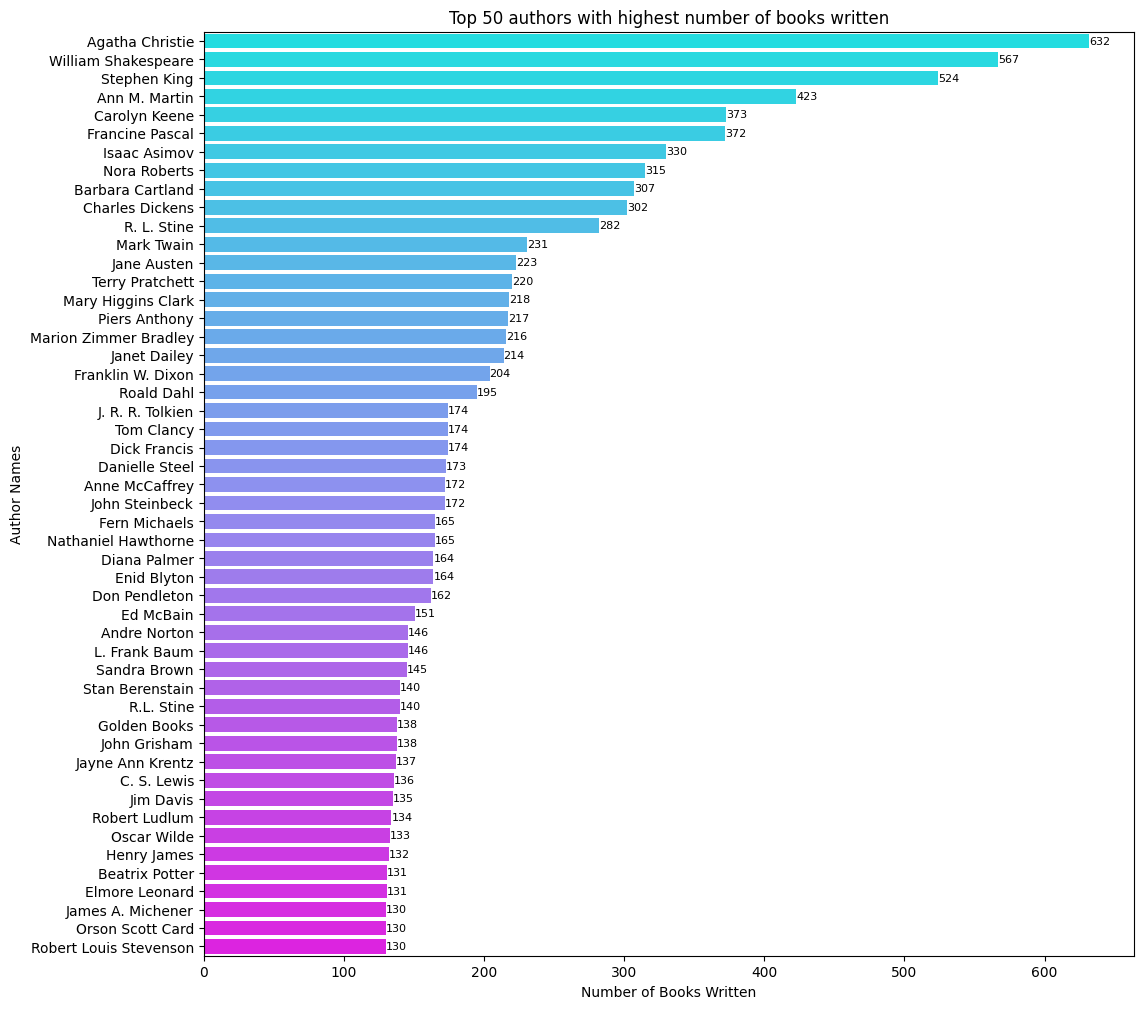

In [39]:
cool = sns.color_palette("cool", n_colors=len(author_book_count_top50.values))

plt.figure(figsize=(12, 12))

sns_plot = sns.barplot(y=author_book_count_top50.index,
                       x=author_book_count_top50.values, palette=cool, orient='h')

for i, value in enumerate(author_book_count_top50.values):
    sns_plot.text(value, i, int(value), ha="left",
                  va="center", color='black', fontsize=8)

plt.ylabel("Author Names")
plt.xlabel("Number of Books Written")
plt.title("Top 50 authors with highest number of books written")
plt.show()

In [40]:
publishers = books['Publisher'].value_counts()
publishers

Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: Publisher, Length: 16804, dtype: int64

In [41]:
top_50_publishers = publishers.sort_values(ascending=False)[:51]
top_50_publishers

Harlequin                             7535
Silhouette                            4220
Pocket                                3905
Ballantine Books                      3783
Bantam Books                          3646
Scholastic                            3160
Simon &amp; Schuster                  2971
Penguin Books                         2844
Berkley Publishing Group              2771
Warner Books                          2727
Penguin USA                           2717
Harpercollins                         2525
Fawcett Books                         2258
Signet Book                           2070
Random House Inc                      2045
St Martins Pr                         1953
St. Martin's Press                    1783
Tor Books                             1704
HarperCollins Publishers              1700
Zebra Books                           1694
Bantam                                1660
Avon                                  1566
Jove Books                            1553
Vintage Boo

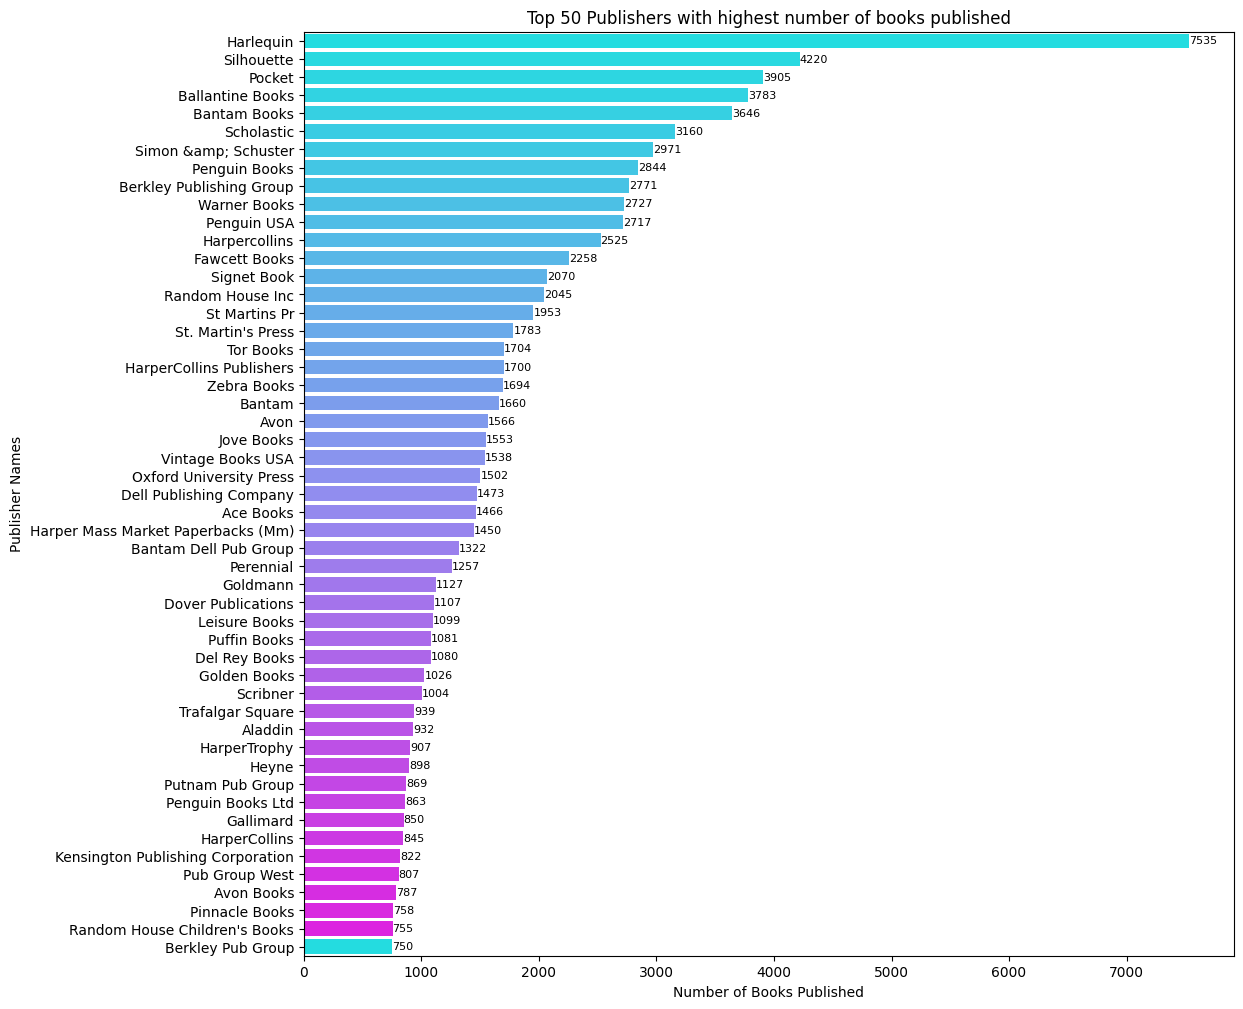

In [42]:
cool = sns.color_palette("cool", n_colors=len(author_book_count_top50.values))

plt.figure(figsize=(12, 12))

sns_plot = sns.barplot(y=top_50_publishers.index,
            x=top_50_publishers.values, palette=cool,orient='h')

for i, value in enumerate(top_50_publishers.values):
    sns_plot.text(value, i, int(value), ha="left",
                  va="center", color='black', fontsize=8)
                  

plt.ylabel("Publisher Names")
plt.xlabel("Number of Books Published")
plt.title("Top 50 Publishers with highest number of books published")
plt.show()


# Ratings Dataset
We have two columns in the ratings dataset with columns: ISBN and rating along with user-ID
Since, it is difficult to identify books based on ISBN, we merge the datasets **Books** and **Ratings** on the ISBN column

In [43]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [44]:
display(books.shape)
display(ratings.shape)

(271360, 8)

(1149780, 3)

In [45]:
bookRating = pd.merge(ratings, books, on="ISBN")
bookRating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [46]:
bookRating.shape

(1031136, 10)

## Dropping useless columns
Since, we donot need the URL here, we can drop the image url columns

In [47]:
bookRating.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)


In [48]:
bookRating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


# Calculating the Average Rating of all Books

In [49]:
averageRating = pd.DataFrame(bookRating.groupby('ISBN')['Book-Rating'].mean().round(1))
averageRating.reset_index(inplace=True)
averageRating.head()

,ISBN,Book-Rating
0,0000913154,8.0
1,0001010565,0.0
2,0001046438,9.0
3,0001046713,0.0
4,000104687X,6.0


In [50]:
averageRating.shape
averageRating.rename(columns={'Book-Rating':'Average-Rating'}, inplace=True)
averageRating.head()

,ISBN,Average-Rating
0,0000913154,8.0
1,0001010565,0.0
2,0001046438,9.0
3,0001046713,0.0
4,000104687X,6.0


In [51]:
averageRatingdf = pd.merge(bookRating, averageRating, on='ISBN')
averageRatingdf.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Average-Rating
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9


In [52]:
averageRatingdf.shape

(1031136, 8)

In [53]:
averageRatingOnly = averageRatingdf[['ISBN','Average-Rating']]
averageRatingOnly.head()

,ISBN,Average-Rating
0,034545104X,2.9
1,034545104X,2.9
2,034545104X,2.9
3,034545104X,2.9
4,034545104X,2.9


In [54]:
averageRatingUnique = averageRatingOnly[['ISBN','Average-Rating']].drop_duplicates(subset=['ISBN'])
averageRatingUnique.head()

,ISBN,Average-Rating
0,034545104X,2.9
60,0155061224,2.5
62,0446520802,4.1
178,052165615X,3.0
179,0521795028,6.0


In [55]:
ratingBooks = pd.merge(books, averageRatingUnique, on='ISBN', how='inner')

In [56]:
display(books.shape)
averageRatingUnique.shape

(271360, 8)

(270151, 2)

In [57]:
books_with_rating = pd.merge(books, averageRatingUnique, on='ISBN')
books_with_rating.shape

(270151, 9)

In [58]:
books_with_rating = books_with_rating[['ISBN','Book-Title','Book-Author','Average-Rating','Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']]
books_with_rating.head()

,ISBN,Book-Title,Book-Author,Average-Rating,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,0.0,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,4.9,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,5.0,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,4.3,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,0.0,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# EDA on Average Rating of Book
Viewing the top 30 books with highest average rating

In [59]:
books_with_rating.sort_values(by=['Average-Rating'], ascending=False).head(30)

,ISBN,Book-Title,Book-Author,Average-Rating,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
127129,0743227565,The Last War : Detective Ferrets and the Case ...,Richard Bach,10.0,2003,Scribner,http://images.amazon.com/images/P/0743227565.0...,http://images.amazon.com/images/P/0743227565.0...,http://images.amazon.com/images/P/0743227565.0...
125450,0345457234,"Return Engagement (Settling Accounts Trilogy, ...",Harry Turtledove,10.0,2004,Del Rey,http://images.amazon.com/images/P/0345457234.0...,http://images.amazon.com/images/P/0345457234.0...,http://images.amazon.com/images/P/0345457234.0...
125460,0505525208,Come To Me,Lisa Cach,10.0,2004,Love Spell,http://images.amazon.com/images/P/0505525208.0...,http://images.amazon.com/images/P/0505525208.0...,http://images.amazon.com/images/P/0505525208.0...
125461,0743477146,Let the Church Say Amen,ReShonda Tate Billingsley,10.0,2004,Pocket,http://images.amazon.com/images/P/0743477146.0...,http://images.amazon.com/images/P/0743477146.0...,http://images.amazon.com/images/P/0743477146.0...
125462,0446691402,Gloriana : Or the Unfulfill'd Queen,Michael Moorcock,10.0,2004,Aspect,http://images.amazon.com/images/P/0446691402.0...,http://images.amazon.com/images/P/0446691402.0...,http://images.amazon.com/images/P/0446691402.0...
125464,0399152172,"Hard, Hard City",Jim Fusilli,10.0,2004,Putnam Publishing Group,http://images.amazon.com/images/P/0399152172.0...,http://images.amazon.com/images/P/0399152172.0...,http://images.amazon.com/images/P/0399152172.0...
125467,0373750390,Coming Home To Texas : Baby To Be (American Ro...,Victoria Chancellor,10.0,2004,Harlequin,http://images.amazon.com/images/P/0373750390.0...,http://images.amazon.com/images/P/0373750390.0...,http://images.amazon.com/images/P/0373750390.0...
125468,0373750382,The Cowboy : The Lost Millionaires (American R...,Leah Vale,10.0,2004,Harlequin,http://images.amazon.com/images/P/0373750382.0...,http://images.amazon.com/images/P/0373750382.0...,http://images.amazon.com/images/P/0373750382.0...
125469,0765306883,Crucible,Nancy Kress,10.0,2004,Tor Books,http://images.amazon.com/images/P/0765306883.0...,http://images.amazon.com/images/P/0765306883.0...,http://images.amazon.com/images/P/0765306883.0...
125470,0425198049,The Painted Rose (Berkley Sensation),DONNA BIRDSELL,10.0,2004,Berkley Publishing Group,http://images.amazon.com/images/P/0425198049.0...,http://images.amazon.com/images/P/0425198049.0...,http://images.amazon.com/images/P/0425198049.0...


In [60]:
ratings_sorted = books_with_rating['Average-Rating'].value_counts().sort_index(ascending=False)
display(ratings_sorted)
books_with_rating['Average-Rating'].value_counts(normalize=True).round(4).sort_index(ascending=False)

10.0     13112
9.8         14
9.7         48
9.6          2
9.5        489
         ...  
0.4        124
0.3        102
0.2         49
0.1         12
0.0     120315
Name: Average-Rating, Length: 100, dtype: int64

10.0    0.0485
9.8     0.0001
9.7     0.0002
9.6     0.0000
9.5     0.0018
         ...  
0.4     0.0005
0.3     0.0004
0.2     0.0002
0.1     0.0000
0.0     0.4454
Name: Average-Rating, Length: 100, dtype: float64

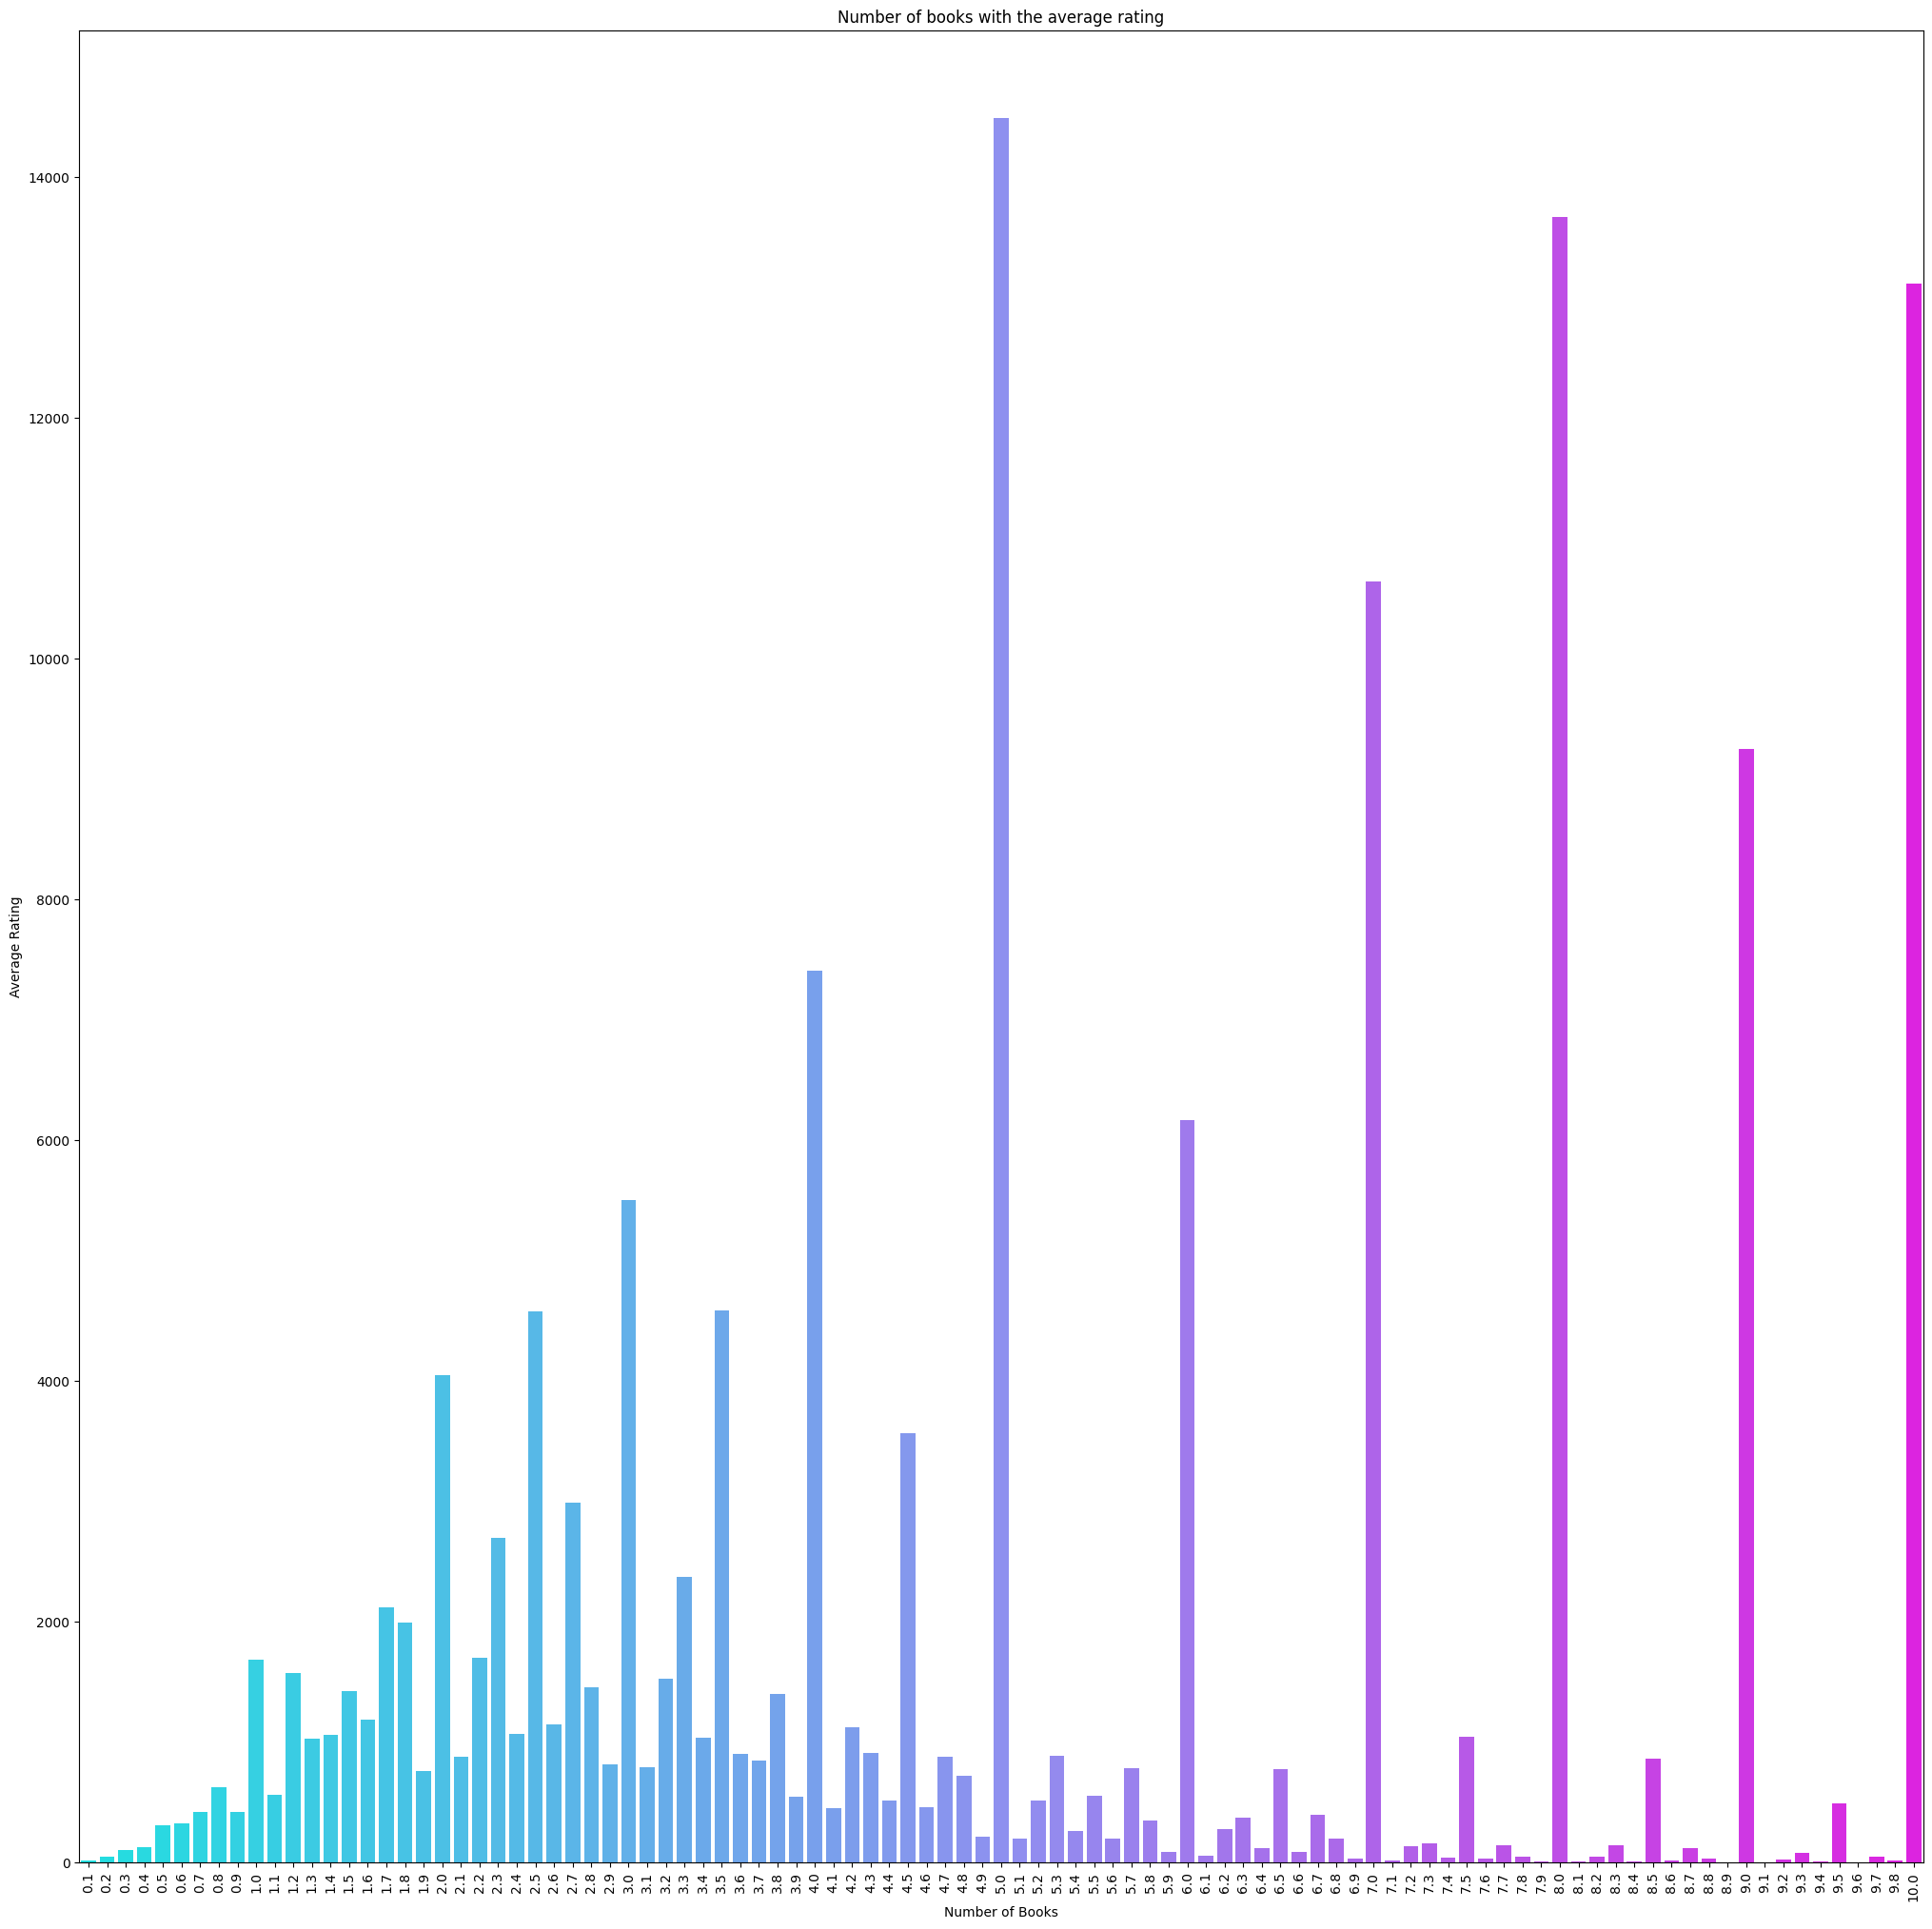

In [61]:
cool = sns.color_palette("cool", n_colors=len(ratings_sorted.values))
plt.figure(figsize=(25,25))
ratings_sorted_0_excluded = ratings_sorted.drop(index=0.0).sort_index(ascending=False)
sns_plot = sns.barplot(x=ratings_sorted_0_excluded.index, y=ratings_sorted_0_excluded.values ,palette=cool)
plt.xticks(rotation='90')
plt.xlabel("Number of Books")
plt.ylabel('Average Rating')
plt.title("Number of books with the average rating")
plt.show()

In [62]:
top_20_ratings = books_with_rating['Average-Rating'].value_counts().drop(index=0.0).sort_values(ascending=False).head(20)

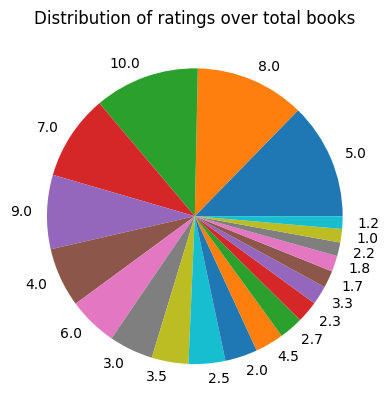

In [63]:
plt.pie(top_20_ratings, labels=top_20_ratings.index)
plt.title("Distribution of ratings over total books")
plt.show()

## Data Visualization results
We can see the most rated books are **5**,**8**, and **10**

In [64]:
display(users.shape)
users.head()


(278858, 2)

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [65]:
len(users.Location.unique())

57339

In [66]:
users.Location.value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64

# MACHINE LEARNING AND BUILDING A MODEL

We would be making and deploying a ML algorithm for book recommendation system.

## Popularity Based Recommender System
We would select the top 50 books that have the highest average ratings and then display them over to the user. <br> But the problem with this system is that if some book has low number of votes but high rating then it could get biased and proportionally incorrect.<br>So, inorder to avoid that we will set a criteria where we only select the average ratings of books that have been voted by at least **100 users**.

In [67]:
ratings_books_merged = ratings.merge(books, on='ISBN')
display(ratings_books_merged.head())
ratings_books_merged.shape

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


(1031136, 10)

## Number of Votes
Lets count the number of votes for each book
<br>

In [68]:
ratings_books_nonzero = ratings_books_merged[ratings_books_merged['Book-Rating']!=0]
num_rating_df = ratings_books_nonzero.groupby('Book-Title').count()['Book-Rating'].sort_values(ascending=False).reset_index()
num_rating_df.rename(columns={'Book-Rating':'Number-of-Ratings'}, inplace=True)
display(num_rating_df)

,Book-Title,Number-of-Ratings
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,494
3,The Secret Life of Bees,406
4,The Nanny Diaries: A Novel,393
...,...,...
135562,Journeys with Elijah: Eight Tales of the Prophet,1
135563,Journeys to Door County,1
135564,Journeys of Simplicity: Traveling Light With T...,1
135565,Journeys into Past Lives,1


# Average Book Rating
Lets find the average ratings of books

In [69]:
avg_rating_df = ratings_books_nonzero.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'Average-Rating'}, inplace=True)
avg_rating_df.head()


,Book-Title,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000


Merging these two dataframes

In [70]:
popularity_df = pd.merge(num_rating_df, avg_rating_df, on='Book-Title')
popularity_df

,Book-Title,Number-of-Ratings,Average-Rating
0,The Lovely Bones: A Novel,707,8.185290
1,Wild Animus,581,4.390706
2,The Da Vinci Code,494,8.439271
3,The Secret Life of Bees,406,8.477833
4,The Nanny Diaries: A Novel,393,7.437659
...,...,...,...
135562,Journeys with Elijah: Eight Tales of the Prophet,1,10.000000
135563,Journeys to Door County,1,8.000000
135564,Journeys of Simplicity: Traveling Light With T...,1,6.000000
135565,Journeys into Past Lives,1,8.000000


Taking the books whose number of ratings are greater than 100

In [71]:
popularity_df_above_100 = popularity_df[popularity_df['Number-of-Ratings']>=100]
popularity_df_above_50 = popularity_df[popularity_df['Number-of-Ratings'] >= 50]
popularity_df_above_250 = popularity_df[popularity_df['Number-of-Ratings'] >= 250]
popularity_df_above_100.sort_values(by='Average-Rating', ascending=False).head()

,Book-Title,Number-of-Ratings,Average-Rating
113,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882
180,"The Return of the King (The Lord of the Rings,...",103,9.213592
27,Harry Potter and the Goblet of Fire (Book 4),247,9.125506
68,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500
42,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393


# New metric for rating calculation
We still have a problem if there are low number of high ratings, and high number of lower ratings, we get a bias and unfairness in the rating scenario.
<br>
To tackle this, lets use a new metric known as weighted metric which can be calculated by:


weighted_rating = (average_rating * number_of_ratings + minimum_threshold * default_rating)/(number_of_ratings + minimum_threshold)
<br><br>
where,<br><br>
**average_rating** is available from dataframe<br>
**number_of_ratings** is available from dataframe<br>
**minimum_threshold** is the minimum number of votes taken for validation. Here, **100** <br>
**default_rating** is the neutral state. Here, **5.0** <br>

In [72]:
# Defining a new function that can calculate the metric
def calcWeightedRating(row, avgRating, numOfRatings, minThres, defRating):
    weightedRating = ((row[avgRating] * row[numOfRatings]) + (minThres * defRating))/(row[numOfRatings] + minThres)
    return weightedRating


Great, lets apply this in our existing dataframe

In [73]:
# For number of ratings above 100
popularity_df_above_100 = popularity_df_above_100.copy()
popularity_df_above_100['Weighted-Rating'] = popularity_df_above_100.apply(lambda x: calcWeightedRating(
     x, 'Average-Rating', 'Number-of-Ratings', 100, 5),axis=1)
popularity_df_above_100.sort_values(
    'Weighted-Rating', ascending=False).head(20)

,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating
11,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,7.987952
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,7.970822
9,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,7.938967
27,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,7.936599
20,To Kill a Mockingbird,267,8.977528,7.893733
2,The Da Vinci Code,494,8.439271,7.860269
0,The Lovely Bones: A Novel,707,8.185290,7.790582
3,The Secret Life of Bees,406,8.477833,7.790514
42,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,7.745981
47,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,7.609836


In [74]:
# For number of ratings above 50
popularity_df_above_50 = popularity_df_above_50.copy()
popularity_df_above_50['Weighted-Rating'] = popularity_df_above_50.apply(lambda x: calcWeightedRating(
    x, 'Average-Rating', 'Number-of-Ratings', 50, 5), axis=1)
popularity_df_above_50.sort_values(
    'Weighted-Rating', ascending=False).head(20)


,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating
27,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,8.430976
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,8.425076
11,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,8.397260
20,To Kill a Mockingbird,267,8.977528,8.350158
9,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,8.329787
42,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,8.272031
113,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,8.166667
68,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500,8.163717
2,The Da Vinci Code,494,8.439271,8.123162
47,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,8.121569


In [75]:
# For number of ratings above 250
popularity_df_above_250 = popularity_df_above_250.copy()
popularity_df_above_250['Weighted-Rating'] = popularity_df_above_250.apply(lambda x: calcWeightedRating(
    x, 'Average-Rating', 'Number-of-Ratings', 250, 5), axis=1)
popularity_df_above_250.sort_values(
    'Weighted-Rating', ascending=False).head(20)


,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating
0,The Lovely Bones: A Novel,707,8.185290,7.353187
2,The Da Vinci Code,494,8.439271,7.283602
11,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,7.194690
9,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,7.173611
3,The Secret Life of Bees,406,8.477833,7.152439
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,7.125237
20,To Kill a Mockingbird,267,8.977528,7.054159
5,The Red Tent (Bestselling Backlist),383,8.182768,6.925750
26,"Tuesdays with Morrie: An Old Man, a Young Man,...",250,8.588000,6.794000
8,Life of Pi,336,8.080357,6.766212


# Merging with the books dataframe
We merge the popularity_df_above_250 with books dataframe to get the information about the book author and other details.

In [76]:
popular_df_merge = pd.merge(popularity_df_above_100, books, on='Book-Title').drop_duplicates('Book-Title',keep='first')
popular_df_merge = popular_df_merge.drop(columns=['Image-URL-S', 'Image-URL-L'])
display(popular_df_merge.shape)
popular_df_merge.sort_values('Weighted-Rating', ascending=False).head(10)

(200, 9)

,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
38,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,7.987952,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
56,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,7.970822,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...
32,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,7.938967,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...
107,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,7.936599,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...
67,To Kill a Mockingbird,267,8.977528,7.893733,0446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...
2,The Da Vinci Code,494,8.439271,7.860269,0385504209,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...
0,The Lovely Bones: A Novel,707,8.185290,7.790582,0316666343,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...
8,The Secret Life of Bees,406,8.477833,7.790514,0142001740,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...
167,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,7.745981,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...
185,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,7.609836,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...


# TOP RATED BOOKS
The books shown above are the top rated books and could be shown in the home page of the app

## Collaborative Filtering Based Approach
For user based recommendation system, we build a new type of data like:

Where each user would have rating for each book and we would also follow criterias like:

1. **Value experienced users ratings:**
    
    We would take the ratings of the users who have rated over 200 books i.e. have studied and reviewed high amount of books with the highest priority.
    
2. **Value books with high ratings:**
    
    We would only recommend books that have more than 50 ratings i.e. popular and famous books.

In [77]:
ratings_books_merged.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


### Filtering Users
Let's find users who have made at least 200 votes.

In [78]:
users_ratings_count = ratings_books_merged.groupby('User-ID').count()['ISBN']
users_ratings_count = users_ratings_count.sort_values(ascending=False).reset_index()
users_ratings_count.rename(columns={'ISBN':'No-of-Books-Rated'}, inplace=True)
display(users_ratings_count.shape)
users_ratings_count.head()

(92106, 2)

,User-ID,No-of-Books-Rated
0,11676,11144
1,198711,6456
2,153662,5814
3,98391,5779
4,35859,5646


There are 92106 users who have rated the books.

In [79]:
users_200 = users_ratings_count[users_ratings_count['No-of-Books-Rated']>=200]
display(users_200.shape)

(816, 2)

There are only 816 users who have rated more than 200 times

In [80]:
books_with_users_200 = pd.merge(users_200, ratings_books_merged, on='User-ID')
display(books_with_users_200.shape)
books_with_users_200.head()

(475007, 11)

,User-ID,No-of-Books-Rated,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,11676,11144,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
1,11676,11144,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
2,11676,11144,0449006522,8,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...
3,11676,11144,0553561618,0,Dark Paradise,TAMI HOAG,1994,Bantam,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...
4,11676,11144,055356451X,9,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...


There are 475007 books that have been voted by the users who have rated more than 200 times.

### Finding books with more than 50 ratings
Lets find books with more than 50 ratings.

In [81]:
display(ratings_books_merged.shape)
ratings_books_merged.head()

(1031136, 10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [82]:
books_ratings_count = ratings_books_merged.groupby('Book-Title').count()['ISBN'].sort_values(ascending=False).reset_index()
books_ratings_count.rename(columns={'ISBN':'Number-of-Book-Ratings'}, inplace=True)
books_ratings_count.head()

,Book-Title,Number-of-Book-Ratings
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828


In [83]:
books_ratings_50 = books_ratings_count[books_ratings_count['Number-of-Book-Ratings']>=50]
display(books_ratings_50.shape)
books_ratings_50.head()

(2444, 2)

,Book-Title,Number-of-Book-Ratings
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828


### Merging the filtered users and books

In [84]:
filtered_books = pd.merge(books_ratings_50, books_with_users_200,  on='Book-Title')
display(filtered_books.shape)
filtered_books.head()

(112423, 12)

,Book-Title,Number-of-Book-Ratings,User-ID,No-of-Books-Rated,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Wild Animus,2502,11676,11144,0971880107,6,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,Wild Animus,2502,198711,6456,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
2,Wild Animus,2502,153662,5814,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
3,Wild Animus,2502,35859,5646,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
4,Wild Animus,2502,76352,3329,0971880107,0,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...


In [85]:
famous_books = filtered_books.groupby('Book-Title').count().reset_index()
famous_books = famous_books['Book-Title']
famous_books = books[books['Book-Title'].isin(famous_books)]
famous_books = famous_books.copy()
famous_books.drop_duplicates(subset=['Book-Title'], inplace=True, keep='first')
famous_books


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
14,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...
18,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
19,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
...,...,...,...,...,...,...,...,...
58940,0553245856,Side Effects,Michael Palmer,1985,Bantam Doubleday Dell,http://images.amazon.com/images/P/0553245856.0...,http://images.amazon.com/images/P/0553245856.0...,http://images.amazon.com/images/P/0553245856.0...
60057,0061092886,The Fallen Man (Joe Leaphorn Novels),Tony Hillerman,1997,HarperTorch,http://images.amazon.com/images/P/0061092886.0...,http://images.amazon.com/images/P/0061092886.0...,http://images.amazon.com/images/P/0061092886.0...
68105,0060176806,Love in Another Town,Barbara Taylor Bradford,1995,Harpercollins,http://images.amazon.com/images/P/0060176806.0...,http://images.amazon.com/images/P/0060176806.0...,http://images.amazon.com/images/P/0060176806.0...
76769,0553587188,Lucky's Lady,TAMI HOAG,2003,Bantam,http://images.amazon.com/images/P/0553587188.0...,http://images.amazon.com/images/P/0553587188.0...,http://images.amazon.com/images/P/0553587188.0...


In [86]:
pt = filtered_books.pivot_table(index='Book-Title',columns='User-ID', values='Book-Rating')
pt.fillna(0, inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


# Working of model:

We make each book as a point made by a vector using the users. That means each books is represented as rating by the user that have made more than 200 votes. Here, 816 users.

After representing them as cosine vectors we then proceed to use the cosine similarity as the measure of similarity.

In [87]:
from sklearn.metrics.pairwise import cosine_similarity

In [88]:
similarities = cosine_similarity(pt)
similarities

array([[1.        , 0.        , 0.        , ..., 0.0554792 , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.08924832, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.04205081, 0.02140784,
        0.02848022],
       ...,
       [0.0554792 , 0.08924832, 0.04205081, ..., 1.        , 0.02461062,
        0.03274109],
       [0.        , 0.        , 0.02140784, ..., 0.02461062, 1.        ,
        0.23165548],
       [0.        , 0.        , 0.02848022, ..., 0.03274109, 0.23165548,
        1.        ]])

In [89]:
similarities.shape

(2444, 2444)

# Making a function

Lets make a function that can recommend books based on the given similarity

## Step 1: Retrieving Index

In [90]:
# Retrieving the index of movie
np.where(pt.index=='1984')

(array([2], dtype=int64),)

Its in the 3rd place of pivot column

In [91]:
np.where(pt.index=='stardust')[0][0]

2443

## Step 2: Use the index to find the array from inside the similarity

In [92]:
# For the 1st movie in the pivot table
display(similarities[0])

# Chaining from the above
similarities[np.where(pt.index=='stardust')[0][0]]

array([1.       , 0.       , 0.       , ..., 0.0554792, 0.       ,
       0.       ])

array([0.        , 0.        , 0.02848022, ..., 0.03274109, 0.23165548,
       1.        ])

## Step 3: Sort the retrieved Array

In [93]:
list(enumerate(similarities[0]))

[(0, 1.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0594470723373386),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0688604317430696),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.2909685675631574),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.12331122634669674),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.11511044209690935),
 (37, 0.13118514119283717),
 (38, 0.08232581676010438),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.12878710361895382),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0

In [94]:
# Sorting without index 
sorted(list(enumerate(similarities[0])), key=lambda x: x[1], reverse=True)

[(0, 1.0),
 (505, 0.5301650263637131),
 (707, 0.49980721032635916),
 (2250, 0.49980721032635916),
 (2067, 0.41586473646422367),
 (1669, 0.3945239297317875),
 (2169, 0.37614325833807666),
 (1213, 0.3735605665432047),
 (1038, 0.3710800935795249),
 (1264, 0.36355624987385),
 (1412, 0.32325614441111855),
 (1181, 0.3085795057135766),
 (2282, 0.2948420075240761),
 (2227, 0.29110181672607033),
 (21, 0.2909685675631574),
 (977, 0.2885638274248393),
 (1868, 0.2885638274248393),
 (1395, 0.27615952827288226),
 (724, 0.2740354543272148),
 (1097, 0.2720605855696647),
 (1685, 0.27125557922729093),
 (281, 0.27113990412868194),
 (265, 0.2682079330322221),
 (127, 0.25179923489550915),
 (1103, 0.25138088072129333),
 (1768, 0.25131880370325305),
 (109, 0.2507667011935206),
 (775, 0.2461341039896772),
 (1132, 0.24376252895075812),
 (396, 0.23439374045767208),
 (2078, 0.23273191657806622),
 (1842, 0.22969765666933156),
 (1229, 0.2274143425276894),
 (1702, 0.22673173405393837),
 (1169, 0.22661931140595826),

## Step 4: Remove the first item and retrieve the top 5
We remove the first item from this array because we dont need to recommend a book that has already been read or displayed

In [95]:
sorted(list(enumerate(similarities[0])), key=lambda x: x[1], reverse=True)[1:6]


[(505, 0.5301650263637131),
 (707, 0.49980721032635916),
 (2250, 0.49980721032635916),
 (2067, 0.41586473646422367),
 (1669, 0.3945239297317875)]

## Step 5: Displaying the name of books from the top 5

In [96]:
for book in sorted(list(enumerate(similarities[0])), key=lambda x: x[1], reverse=True)[1:6]:
    print(book[0])



505
707
2250
2067
1669


In [97]:
for book in sorted(list(enumerate(similarities[0])), key=lambda x: x[1], reverse=True)[1:6]:
    print(pt.index[book[0]])


Decider
Free Fall
Therapy
The Pied Piper
The 13th Juror


In [98]:
if 'hamkmfa' in pt.index:
    np.where(pt.index=='hamkda')[0][0]
else:
    print('Book not found')

Book not found


# Making the function

In [99]:
def recommend(book_name):
    if book_name in pt.index:
        index = np.where(pt.index == book_name)[0][0]
        similar_books_list = sorted(
        list(enumerate(similarities[index])), key=lambda x: x[1], reverse=True)[1:11]
        
        print(f'Recommendations for the book {book_name}:')
        print('-'*5)
        for book in similar_books_list:
            print(pt.index[book[0]])
        print('\n')

    else:
        print('Book Not Found')
        print('\n')

recommend('Harry Potter and the Chamber of Secrets (Book 2)')
recommend('1984')
recommend('Message in a Bottle')
recommend('The Da Vinci Code')
recommend('The Return of the King (The Lord of the Rings, Part 3)')
recommend('The Hobbit')


Recommendations for the book Harry Potter and the Chamber of Secrets (Book 2):
-----
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Charlotte's Web (Trophy Newbery)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Shelters of Stone (Earth's Children Series, No 5)
The Eye of the World (The Wheel of Time, Book 1)
Stiff: The Curious Lives of Human Cadavers


Recommendations for the book 1984:
-----
Lying Awake
The Restaurant at the End of the Universe (Hitchhiker's Trilogy (Paperback))
Waiting
Animal Farm
The Handmaid's Tale
Roll of Thunder, Hear My Cry
Awakening
A Portrait of the Artist As a Young Man
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
Brave New World


Recommendations for the book Message in a Bottle:
-----
Nights in Rodanthe
The 

# Conclusion
Great, the recommendation system is working fine.
We get the books with good recommendations.